In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style('whitegrid')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Load the ten years data from my computer folder

In [3]:
df2010 = pd.read_csv('2010 data/h20101091tabmef.csv')
df2011 = pd.read_csv('2011 data/2011109h1tabmef.csv')
df2012 = pd.read_csv('2012 data/2012109h1tabmef.csv')
df2013 = pd.read_csv('2013 data/h20131091tabmef.csv')
df2014 = pd.read_csv('2014 data/2014109h1tabmef.csv')
df2015a = pd.read_csv('2015 data/H20151091TabMef_1.csv')
df2015b = pd.read_csv('2015 data/H20151091TabMef_2.csv')
df2016 = pd.read_csv('2016 data/H20161091TabMef.csv')
df2017 = pd.read_csv('2017 data/h20171092tabmef.csv')
df2018 = pd.read_csv('2018 data/2018109H1TabMef.csv')
df2019 = pd.read_csv('2019 data/2019109H1TabMef.csv')
df2020 = pd.read_csv('2020 data/H20201091/H20201091TabMef.csv')
df2021 = pd.read_csv('2021 data/H20211092TabMef.csv')

# Concatenate all data to Pandas DataFrame

In [4]:
df_total = pd.concat(
    [df2010,df2011,df2012,df2012,df2013,df2014,df2015a
    ,df2015b,df2016,df2017,df2018,df2019,df2020
    ,df2021],axis=0)
# Drop unnecessary columns.
df_total = df_total.drop('status', axis=1)
df_total = df_total.drop('status_reshuma', axis=1)

# Filter to busiest and lighest road.
df_busiest = df_total[df_total.nefah >3000 ]
df_lighest = df_total[df_total.nefah <1000 ]
df_lighest = df_lighest[df_lighest.nefah >200 ]



# VIsualize the morning traffic in the busiest roads

<Figure size 1152x432 with 0 Axes>

[Text(0.5, 0, 'Road Number'),
 Text(0, 0.5, 'Number of cars per hour'),
 Text(0.5, 1.0, 'Morning Busiest Traffic 08:00')]

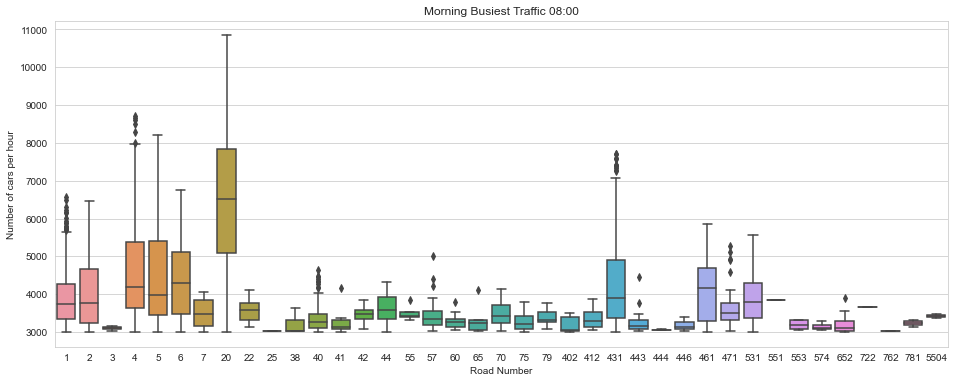

In [5]:
most_morning_traffic = df_busiest[df_busiest['shaa']==8]
plt.figure(figsize=(16,6))
vis = sns.boxplot(most_morning_traffic,x='kvish',y='nefah')
vis.set(xlabel='Road Number', ylabel='Number of cars per hour',title='Morning Busiest Traffic 08:00')

# VIsualize the noon traffic in the busiest roads

<Figure size 1152x432 with 0 Axes>

[Text(0.5, 0, 'Road Number'),
 Text(0, 0.5, 'Number of cars per hour'),
 Text(0.5, 1.0, 'Noon Busiest Traffic -12:00')]

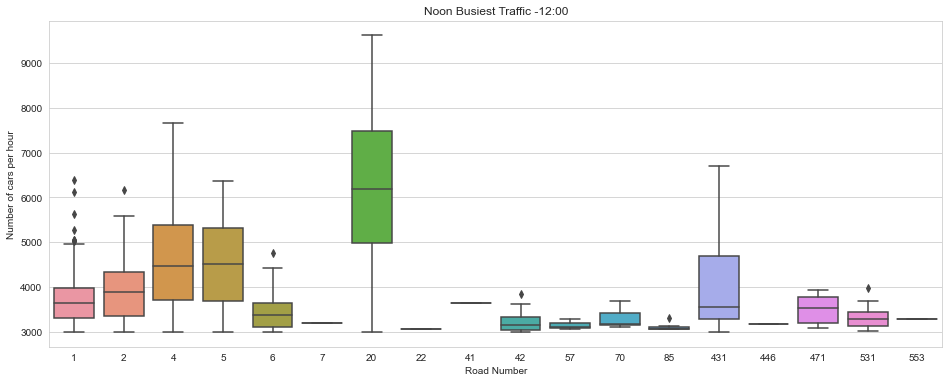

In [6]:
most_noon_traffic = df_busiest[df_busiest['shaa']==12]
plt.figure(figsize=(16,6))
vis = sns.boxplot(most_noon_traffic,x='kvish',y='nefah')
vis.set(xlabel='Road Number', ylabel='Number of cars per hour',title='Noon Busiest Traffic -12:00')

# VIsualize the evening traffic in the busiest roads

<Figure size 1152x432 with 0 Axes>

[Text(0.5, 0, 'Road Number'),
 Text(0, 0.5, 'Number of cars per hour'),
 Text(0.5, 1.0, 'Evening Busiest Traffic -18:00')]

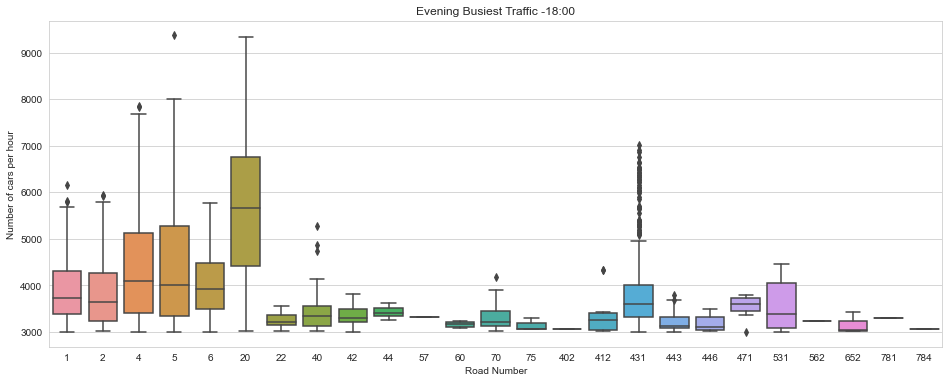

In [7]:
most_evening_traffic = df_busiest[df_busiest['shaa']==18]
plt.figure(figsize=(16,6))
vis = sns.boxplot(most_evening_traffic,x='kvish',y='nefah')
vis.set(xlabel='Road Number', ylabel='Number of cars per hour',title='Evening Busiest Traffic -18:00')

# VIsualize the night traffic in the busiest roads

<Figure size 1152x432 with 0 Axes>

[Text(0.5, 0, 'Road Number'),
 Text(0, 0.5, 'Number of cars per hour'),
 Text(0.5, 1.0, 'Night Busiest Traffic 22:00')]

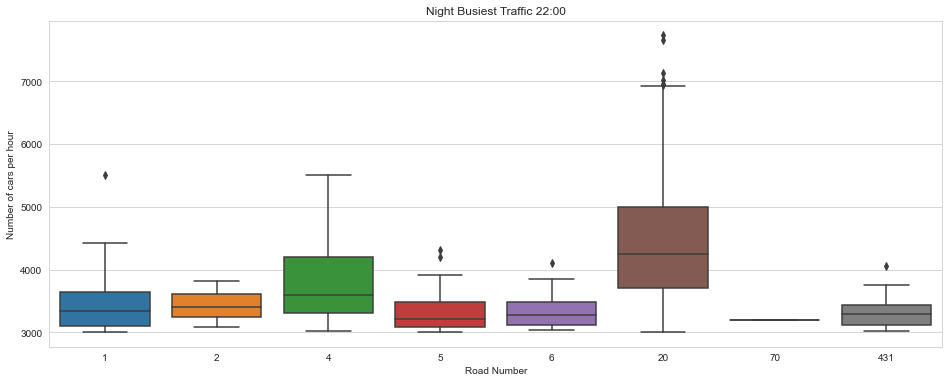

In [8]:
most_night_traffic = df_busiest[df_busiest['shaa']==22]
plt.figure(figsize=(16,6))
vis = sns.boxplot(most_night_traffic,x='kvish',y='nefah')
vis.set(xlabel='Road Number', ylabel='Number of cars per hour',title='Night Busiest Traffic 22:00')

# Road number 20 - one of the busiest roads, Distribution during days and hours.

<Figure size 1152x576 with 0 Axes>

<AxesSubplot:xlabel='yom', ylabel='nefah'>

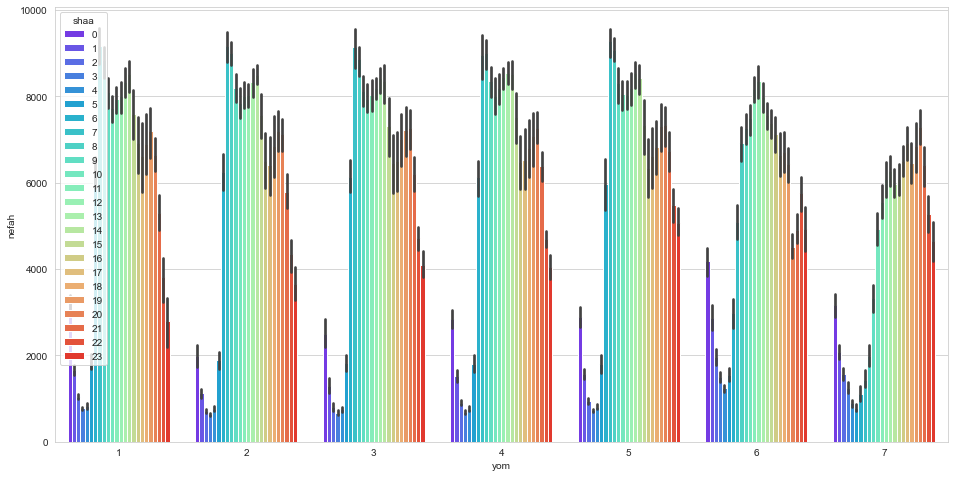

In [9]:
haashalom = df_total[df_total['kvish']==20]
haashalom = haashalom[haashalom['keta']==14]
plt.figure(figsize=(16,8))
sns.barplot(haashalom, x='yom', y='nefah', hue='shaa',palette='rainbow')

# Road number 20, the road traffic at 8 am distributed by days.

<Figure size 1152x576 with 0 Axes>

<AxesSubplot:xlabel='yom', ylabel='nefah'>

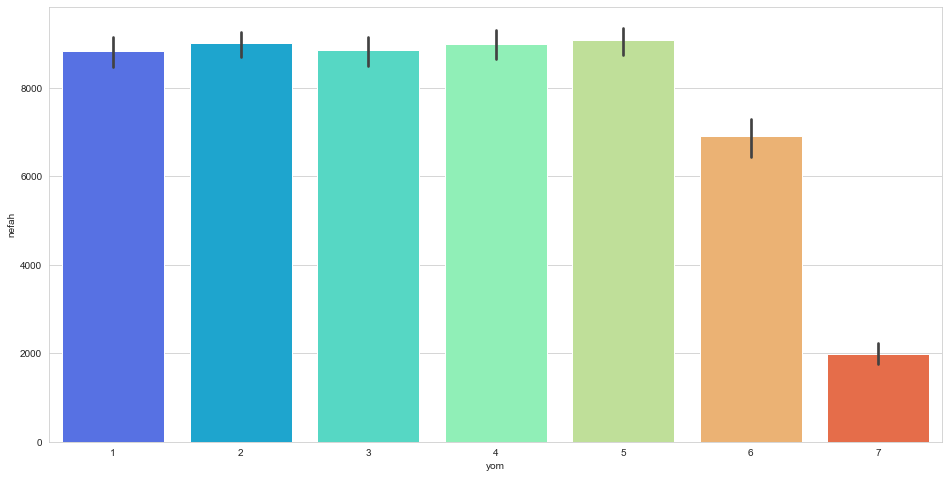

In [10]:
haashalom = df_total[df_total['kvish']==20]
haashalom = haashalom[haashalom['keta']==14]
haashalom = haashalom[haashalom['shaa']==8]
plt.figure(figsize=(16,8))
sns.barplot(haashalom, x='yom', y='nefah',palette='rainbow')

# Distribution of the busiest roads by days.

<Figure size 1440x720 with 0 Axes>

<AxesSubplot:xlabel='kvish', ylabel='nefah'>

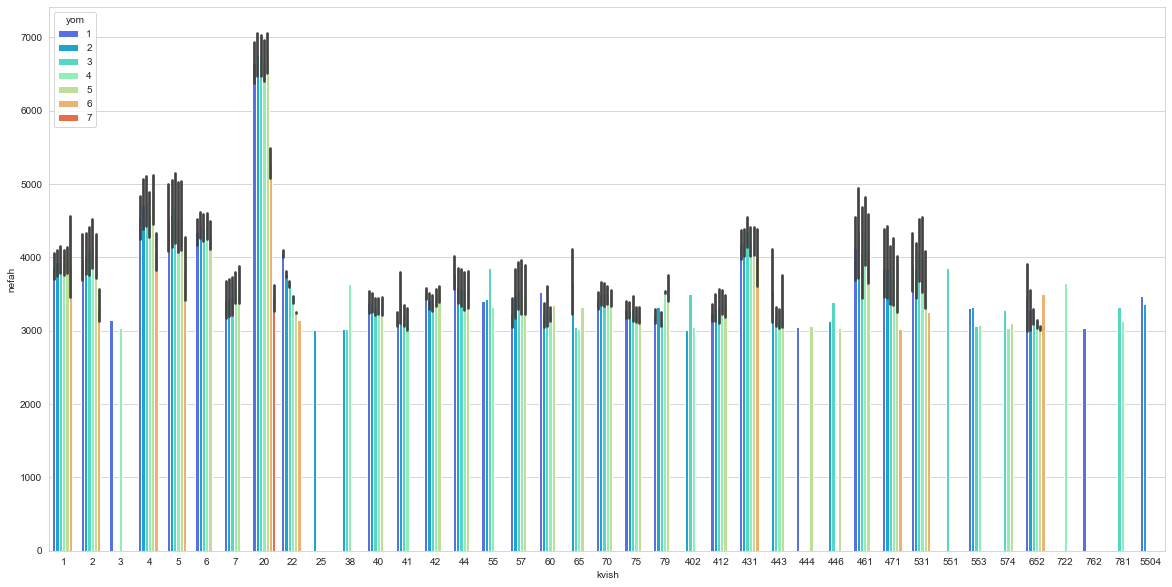

In [11]:
tmp= df_busiest[df_busiest['shaa']==8]
plt.figure(figsize=(20,10))
sns.barplot(tmp, x='kvish', y='nefah',hue='yom', palette='rainbow')

In [12]:
# we can see that a few roads are shown only in spesific days, and not in the whole week. lets explor road 722:
road_722 = df_total[df_total['kvish']==722]
road_722.sort_values('nefah', ascending=False).head(10)
# From the output, we can see that there are only one row that fit with the condition for busiest traffic (nefah>3000)
road_722.loc[road_722['nefah']>3000]['yom'].unique()
# The only day that fit with the condition is 4(wednesday)

#Now lets see that road 20 is fit with the condition in the whole week:
road20 =  df_total[df_total['kvish']==20]
road20.loc[road20['nefah']>3000]['yom'].unique()

,shana,kvish,keta,maslul,hodesh,taarich,yom,shaa,nefah
28736,2015,722,10,1,4,29,4,8,3655
79806,2017,722,10,1,9,3,1,6,2930
28737,2015,722,10,1,4,29,4,9,2836
28734,2015,722,10,1,4,29,4,6,2711
79807,2017,722,10,1,9,3,1,7,2708
131200,2020,722,5,2,8,4,3,16,2694
79808,2017,722,10,1,9,3,1,8,2693
86288,2014,722,10,1,12,22,2,8,2631
79805,2017,722,10,1,9,3,1,5,2611
82672,2012,722,10,2,12,3,2,16,2600


array([4], dtype=int64)

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

# Find the best hour to drive on road 20 north.

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='shaa', ylabel='nefah'>

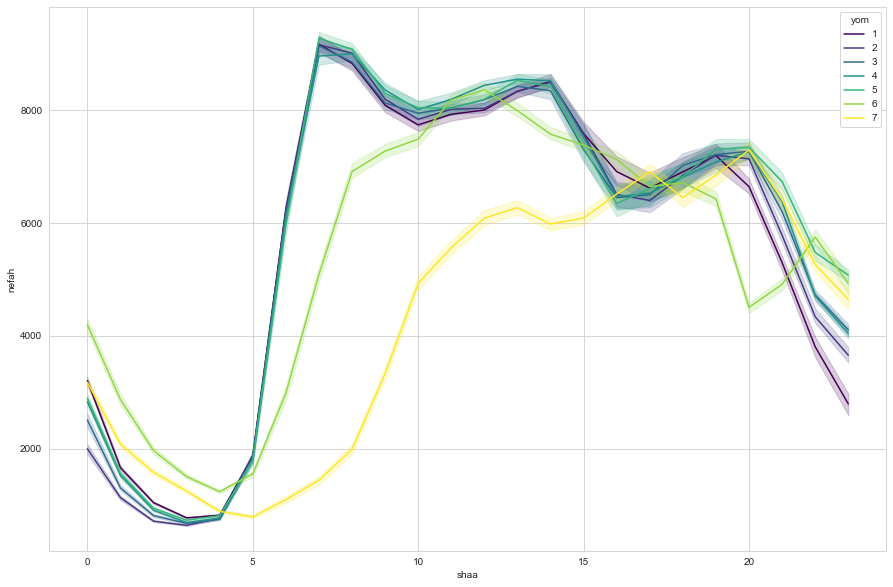

In [13]:
haashalom = df_total[df_total['kvish']==20]
haashalom = haashalom[haashalom['keta']==14]
plt.figure(figsize=(15,10))
sns.lineplot(haashalom,x='shaa',y='nefah',hue='yom',palette='viridis',errorbar=('ci', 50))


# Road 20 - Distribution by years.

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='shana', ylabel='nefah'>

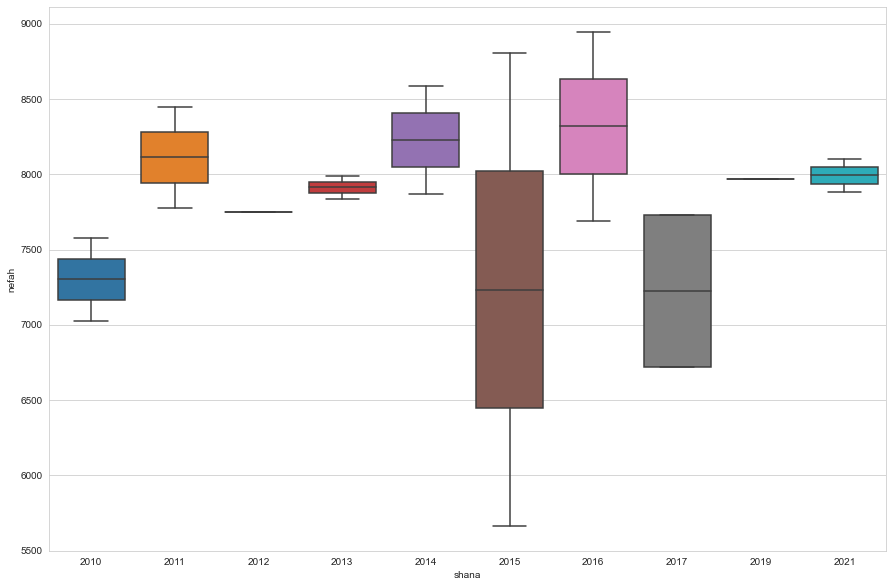

In [14]:
haashalom = df_total[df_total['kvish']==20]
haashalom = haashalom[haashalom['keta']==14]
haashalom_t = haashalom[haashalom['shaa']==10]
haashalom_t = haashalom_t[haashalom_t['yom']==1]
plt.figure(figsize=(15,10))
sns.boxplot(haashalom_t,x='shana', y='nefah')
